**One state MDP:** Taking ‘right’ takes the agent to blue state with probability ‘p’ and to the red state with ‘1-p’. Likewise, taking ‘left’ takes the agent to red state with probability ‘p’ and to the blue state with ‘1-p’


<img src="images/1_state_MDP.png">

In [8]:
import numpy as np

class myException(Exception):
    pass


# one state MDP

class singleStateMDP():
    def __init__(self, p):
        self.start = "Start"
        self.p = p
        self.done = False
        
    def reset(self):
        self.done = False
        self.state = "Start"
        return self.state
    
    def step(self, action):
        '''
        0 - go left
        1 - go right
        '''
        if not(self.done):
            uniform_sample = np.random.uniform()

            if uniform_sample < 1-self.p:
                action = not(action)

            if action:
                self.state = "Blue"
                reward = +10

            else:
                self.state = "Red"
                reward = +5

            self.done = True

            return self.state, reward
        
        else:
            raise myException("Reset before running")

In [9]:
def epsilon_greedy(q_values, epsilon=0.1):
    '''
    return a random action with probability epsilon
    '''
    uniform_sample = np.random.uniform()
    
    if uniform_sample >= epsilon:
        return np.argmax(q_values)
    
    else:
        return np.random.choice([0,1])

In [10]:
import time
from IPython import display

def plotFunction(data):
    plt.gca().cla() 
    plt.bar([0,1], data, width=0.2)
    plt.xlabel('actions', fontsize=12)
    plt.ylabel('action-value', fontsize=12)
    plt.xticks([0,1], ["left", "right"], fontsize=12, rotation=30)
    plt.ylim([0,10])
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(0.01)

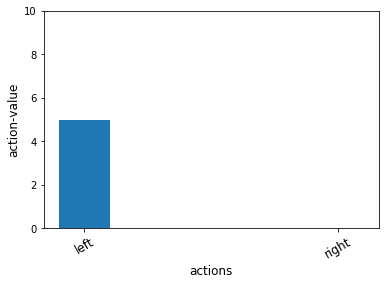

In [11]:
'''
Let's investigate if we behave greedily while learning (without exploration)
epsilon = 0
fix p = 1

Remember: We would pick sub-optimal action
'''

import matplotlib.pyplot as plt

q_values = np.zeros((2))
env = singleStateMDP(p=1) # single state MDP with p=1; deterministic MDP
action = 0 # starting action

for episodes in range(100): # run for 100 episodes
    _ = env.reset()
    plotFunction(q_values)
    next_state, reward = env.step(action)
    q_values[action] = q_values[action] + 0.1 * (reward - q_values[action])
    action = epsilon_greedy(q_values, epsilon=0) # behave greedily
    
display.clear_output(wait=True)

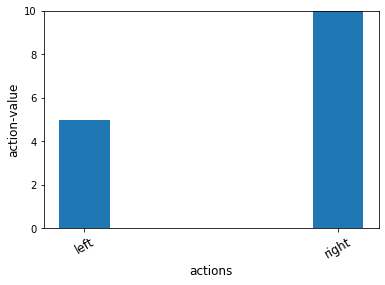

In [12]:
'''
Let's investigate if we behave greedily while exploring with probability epsilon
fix epsilon = 0.2
fix p = 1
'''

import matplotlib.pyplot as plt

q_values = np.zeros((2))
env = singleStateMDP(p=1) # single state MDP with p=1; deterministic MDP
action = 0 # starting action

for episodes in range(200): # run for 500 episodes
    _ = env.reset()
    plotFunction(q_values)
    next_state, reward = env.step(action)
    q_values[action] = q_values[action] + 0.1 * (reward - q_values[action])
    action = epsilon_greedy(q_values, epsilon=0.2) # behave greedily
    
display.clear_output(wait=True)

KeyboardInterrupt: 

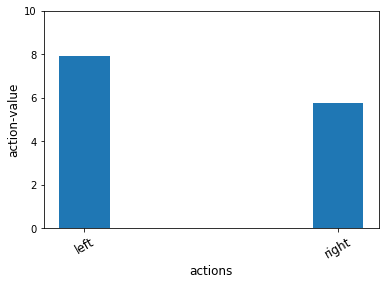

In [13]:
'''
Let's investigate if we behave greedily while exploring with probability epsilon
fix epsilon = 0.2
fix p = 0.5
'''

import matplotlib.pyplot as plt

q_values = np.zeros((2))
env = singleStateMDP(p=0.5) # single state MDP with p=0.5;
action = 0 # starting action
lr = 0.1

for episodes in range(400): # run for 500 episodes
    _ = env.reset()
    plotFunction(q_values)
    next_state, reward = env.step(action)
    q_values[action] = q_values[action] + lr * (reward - q_values[action])
    action = epsilon_greedy(q_values, epsilon=0.2) # behave greedily
    
    if (episodes+1)%50==0:
        lr *= 0.8
    
display.clear_output(wait=True)

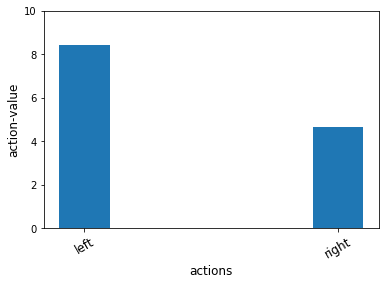

In [14]:
'''
Let's investigate if we behave greedily while exploring with probability epsilon
fix epsilon = 0.2
fix p = 0.2
'''

import matplotlib.pyplot as plt

q_values = np.zeros((2))
env = singleStateMDP(p=0.2) # single state MDP with p=0.2;
action = 0 # starting action
lr = 0.1

for episodes in range(200):
    _ = env.reset()
    plotFunction(q_values)
    next_state, reward = env.step(action)
    q_values[action] = q_values[action] + lr * (reward - q_values[action])
    action = epsilon_greedy(q_values, epsilon=0.2) # behave greedily
    
display.clear_output(wait=True)